<a href="https://colab.research.google.com/github/usmankhawar22/Machine-Learning/blob/master/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification and Error Metrics
# MUHAMMAD USMAN KHAWAR
#208775
#BESE-8B

## Introduction
After data analysis and visualization, identify the key features, convert them to suitable numeric format, and use only the processed features for further processing and prediction. Plot and observe the spread of the disease in other countries and identify top countries whose data can be used to predict the spread in Pakistan.

# Section 1

In this section will use [Novel Corona Virus 2019 Dataset](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset) to classify if a patient will survive the COVID-19. You will use `COVID19_line_list_data.csv` and `COVID19_open_line_list.csv` for this assignment.

#COVID19_line_list_data.csv

-Correlated: reporting date, location, gender. age, symptoms_onset, if_onset_approximated, hospital visit date,symptoms,exposure start,exposure end,visiting wuhan
 


#COVID19_open_line_list.csv

 -Correlated: age, sex, city, province, country, symptoms, travel histroy, chronic disease, date_confirmation, 
  date_death_or_discharge, date_hospital_admission, outcome

## Question 1
Explore both the CSVs mentioned above and argue which has more useful features for correctly classifying if a patient is likely to survive the COVID-19. Mention specific features from both files that will and will not correlate to the target (outcome).

## Question 2

Import the chosen file and do the following:

* Examine the data types--there are many columns, so it might be wise to use value counts
* Determine if the floating point values need to be scaled
* Remove extra feature columns
* Encode the non-numeric values as an integer
* Determine the breakdown of target values

In [0]:
import pandas as pd
import numpy as np

In [0]:
df=pd.read_csv('COVID19_open_line_list.csv')

In [0]:
df.shape

(14126, 45)

In [0]:
df  = df[['age', 'sex', 'city', 'province', 'country', 'date_admission_hospital', 'date_confirmation', 'symptoms', 'lives_in_Wuhan', 'travel_history_dates', 'travel_history_location','outcome']]




In [0]:
#to make data consistent replace inconsistent
missing_values = ["N/A", "na", "n/a"]
for column in df:
  df[column]=df[column].replace(missing_values, np.nan , inplace = False)
  df[column]=df[column].astype(str).str.lower()



the NAN values in this data makes it void


In [0]:
print (df['outcome'].value_counts(dropna=False))

nan                                                                         13942
stable                                                                         78
discharge                                                                      45
discharged                                                                     39
death                                                                          12
died                                                                            3
recovered                                                                       2
05.02.2020                                                                      1
symptoms only improved with cough. currently hospitalized for follow-up.        1
treated in an intensive care unit (14.02.2020)                                  1
severe                                                                          1
critical condition, intubated as of 14.02.2020                                  1
Name: outcome, d

In [0]:
df['outcome'].replace(["discharge", "discharged",'stable','recovered'], 0, inplace = True)


In [0]:
df['outcome'] = df['outcome'].replace(['death', 'died'],1 , inplace = False)

In [0]:
df = df[(df['outcome'] == 1) | (df['outcome']== 0)]
df.reset_index(inplace=True)

In [0]:
print (df['outcome'].value_counts(dropna=False))

0    164
1     15
Name: outcome, dtype: int64


In [0]:
df.shape

(179, 13)

#there are very less rows with output labels, so it is not useful

#NOW USING DATA SET FROM GITHUB


In [76]:
df2=pd.read_csv('latestdata.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,9,10,12,13,14,15,16,17,19,21,22,23,24,25,26,27,31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [77]:
for col in df2.columns:
  print(col, end=", ")

ID, age, sex, city, province, country, latitude, longitude, geo_resolution, date_onset_symptoms, date_admission_hospital, date_confirmation, symptoms, lives_in_Wuhan, travel_history_dates, travel_history_location, reported_market_exposure, additional_information, chronic_disease_binary, chronic_disease, source, sequence_available, outcome, date_death_or_discharge, notes_for_discussion, location, admin3, admin2, admin1, country_new, admin_id, data_moderator_initials, travel_history_binary, 

In [0]:
df2  = df2[['age', 'sex', 'city', 'province', 'country',  'date_admission_hospital', 'date_confirmation', 'symptoms','chronic_disease', 'lives_in_Wuhan', 'travel_history_dates', 'travel_history_location','outcome']]




#first setting the target is more handy as cleaning the data with no output variable holds no significance


In [79]:
print (df2['outcome'].value_counts(dropna=False))

NaN                                                                         431226
Under treatment                                                                359
discharge                                                                      167
stable                                                                         156
died                                                                           149
discharged                                                                      97
Receiving Treatment                                                             88
recovered                                                                       60
stable condition                                                                50
death                                                                           47
Stable                                                                          14
Alive                                                                           14
Dead

In [80]:
df2.shape

(432479, 13)

In [0]:
df2['outcome']=df2['outcome'].str.lower()

In [0]:
df2['outcome'].replace(["discharge", "discharged","stable condition",
                        'Recovered','recovered','Stable','Alive','Discharged',"released from quarantine",
                        'stable','Discharged from hospital'
                        ], 0, inplace = True)

In [0]:
#df2['outcome']=df2['outcome'].str.lower()
df2.replace(['death', 'died','dead','deceased'],1 , inplace = True)

In [0]:
df2 = df2[(df2['outcome'] == 1) | (df2['outcome']== 0)]
#df.reset_index(inplace=True)

In [85]:
print (df2['outcome'].value_counts(dropna=False))


0    556
1    216
Name: outcome, dtype: int64


In [0]:
df2=df2.reset_index(drop=True)

In [87]:
df2.head()

,age,sex,city,province,country,date_admission_hospital,date_confirmation,symptoms,chronic_disease,lives_in_Wuhan,travel_history_dates,travel_history_location,outcome
0,78,male,Vo Euganeo,Veneto,Italy,NaN,21.02.2020,NaN,NaN,NaN,NaN,NaN,1
1,61,female,NaN,NaN,Singapore,NaN,14.02.2020,NaN,NaN,NaN,NaN,NaN,0
2,28,male,NaN,NaN,Singapore,NaN,14.02.2020,NaN,NaN,NaN,NaN,NaN,0
3,56,female,NaN,NaN,Singapore,NaN,14.02.2020,NaN,NaN,NaN,NaN,NaN,0
4,79,female,Mei Hwan Drive,NaN,Singapore,NaN,14.02.2020,NaN,NaN,no,NaN,NaN,0


In [88]:
#data observation 
for column in df2.columns.values.tolist():
    print(column)
    print (df2[column].value_counts())
    print("")

age
22-80    46
19-77    22
21-72    18
80-89    17
38       17
         ..
13        1
15.0      1
47.0      1
38.0      1
80-       1
Name: age, Length: 104, dtype: int64

sex
male      380
female    245
Name: sex, dtype: int64

city
National Centre for Infectious Diseases    44
Wuhan City                                 40
Addis Ababa                                36
Quezon                                     34
Xi'an City                                 28
                                           ..
Morbihan                                    1
Bacoor                                      1
Pantukan                                    1
Batangas                                    1
Tayasan                                     1
Name: city, Length: 167, dtype: int64

province
Metro Manila      107
Jiangsu            86
Shaanxi            46
Hubei              41
Washington         34
                 ... 
Laguna              1
Emilia-Romagna      1
Bavaria             1
Abra        

#As we have cleaned the data using target variable hence there won't be a need to further clean the data as it is very much consistent already

In [89]:
df2.dtypes

age                        object
sex                        object
city                       object
province                   object
country                    object
date_admission_hospital    object
date_confirmation          object
symptoms                   object
chronic_disease            object
lives_in_Wuhan             object
travel_history_dates       object
travel_history_location    object
outcome                    object
dtype: object

In [0]:
from sklearn import preprocessing
df2=df2.astype(str)

df2 = df2.fillna(df2.mode().iloc[0])
le = list()

for col in list(df2.columns):
 
  l = preprocessing.LabelEncoder()
  l.fit(df2[col])
  df2[col] = l.transform(df2[col])
  le.append(l)
  

In [91]:
df2

,age,sex,city,province,country,date_admission_hospital,date_confirmation,symptoms,chronic_disease,lives_in_Wuhan,travel_history_dates,travel_history_location,outcome
0,84,1,150,81,13,58,48,95,62,0,47,60,1
1,65,0,167,88,22,58,30,95,62,0,47,60,0
2,26,1,167,88,22,58,30,95,62,0,47,60,0
3,59,0,167,88,22,58,30,95,62,0,47,60,0
4,85,0,92,88,22,58,30,95,62,1,47,60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,89,0,71,84,28,58,5,95,62,0,47,60,1
768,89,0,71,84,28,58,1,95,62,0,47,60,1
769,88,0,31,82,28,58,41,95,62,0,47,60,1
770,100,0,71,84,28,58,8,95,62,0,47,60,1


In [92]:
# EncodedData ------------- #
for col in df2.columns:
  print(df2[col].value_counts(dropna=False))
  print("\n \n")

104    67
20     46
11     22
18     18
89     17
       ..
5       1
16      1
2       1
99      1
88      1
Name: age, Length: 105, dtype: int64

 

1    380
0    245
2    147
Name: sex, dtype: int64

 

167    72
103    44
155    40
0      36
118    34
       ..
40      1
34      1
33      1
131     1
81      1
Name: city, Length: 168, dtype: int64

 

88    167
54    107
41     86
70     46
37     41
     ... 
49      1
48      1
47      1
39      1
0       1
Name: province, Length: 89, dtype: int64

 

4     247
19    143
22    110
28     40
6      37
29     32
1      24
30     16
15     14
14     12
23     12
0       9
20      8
13      7
10      7
7       7
16      6
3       6
2       4
5       4
12      4
8       3
25      3
9       3
11      2
24      2
26      2
17      2
27      2
31      2
18      1
21      1
Name: country, dtype: int64

 

58    483
4      22
56     16
55     14
26     14
43     13
47     10
13     10
42     10
44     10
6      10
49     10
1       8
11   

#coverting to int(numerical value)

In [93]:
df2 = df2.astype(int)
df2

,age,sex,city,province,country,date_admission_hospital,date_confirmation,symptoms,chronic_disease,lives_in_Wuhan,travel_history_dates,travel_history_location,outcome
0,84,1,150,81,13,58,48,95,62,0,47,60,1
1,65,0,167,88,22,58,30,95,62,0,47,60,0
2,26,1,167,88,22,58,30,95,62,0,47,60,0
3,59,0,167,88,22,58,30,95,62,0,47,60,0
4,85,0,92,88,22,58,30,95,62,1,47,60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,89,0,71,84,28,58,5,95,62,0,47,60,1
768,89,0,71,84,28,58,1,95,62,0,47,60,1
769,88,0,31,82,28,58,41,95,62,0,47,60,1
770,100,0,71,84,28,58,8,95,62,0,47,60,1


In [95]:
df2.columns

Index(['age', 'sex', 'city', 'province', 'country', 'date_admission_hospital',
       'date_confirmation', 'symptoms', 'chronic_disease', 'lives_in_Wuhan',
       'travel_history_dates', 'travel_history_location', 'outcome'],
      dtype='object')

## Question 3

* Split the data into train and test data sets. This can be done using any method, but consider using Scikit-learn's `StratifiedShuffleSplit` to maintain the same ratio of predictor classes.
* Regardless of methods used to split the data, compare the ratio of classes in both the train and test splits.

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.1)

X= df2.iloc[:,0:12]
Y= df2.iloc[:,-1]

X = np.array(X).astype(int)
Y = np.array(Y).astype(int)


for train_index, test_index in splitter.split(X, Y):
  x_train, x_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]

In [98]:
print("Ratio of recovered to death in train data:",(y_train == 0).sum() / (y_train == 1).sum())
print('Ratio of recovered to death in test data:',(y_test == 0).sum() / (y_test == 1).sum())

Ratio of recovered to death in train data: 2.577319587628866
Ratio of recovered to death in test data: 2.5454545454545454


## Question 4

Let's now fit a Naive Bayes classifier to this data in order to predict "outcome".

* Pick the appropriate type of Naive Bayes given the nature of your dataset (data types of columns).Choices are:
    * GaussianNB
    * MultinomialNB
    * BernoulliNB
* Use `cross_val_score` to see how well your choice works.

GaussianNB: It's specifically used when the features have continuous values. It's also assumed that all the features are following a gaussian distribution.

MultinomialNB:It explicitly models the word counts and adjusts the underlying calculations to deal with in.

BernoulliNB: assumes that all our features are binary such that they take only two values. which is not the case in given data.

so we will use GaussianNB wil be used.

In [100]:

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

clf = GaussianNB()
score = cross_val_score(clf, x_train, y_train, cv=5)
print('Cross-Validation scores for cv=5:', score)

Cross-Validation scores for cv=5: [0.81294964 0.82014388 0.82733813 0.84172662 0.88405797]


In [101]:
clf.fit(x_train, y_train)
preds = clf.predict(x_test)

from sklearn import metrics
from sklearn.metrics import accuracy_score
print ('Accuracy: ',accuracy_score(preds, y_test))


Accuracy:  0.8717948717948718


## Question 5

Now let's try all types of Naive Bayes and observe what happens

* Compare the cross validation scores for Gaussian, Bernouilli and Multinomial Naive Bayes.
* Why is BernoulliNB performing like it does?

In [106]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

MultiClf = MultinomialNB()
bernoulliClf = BernoulliNB()

print('Cross-Validation scores for MultiNomial:', cross_val_score(MultiClf, x_train, y_train, cv=5))
print('Cross-Validation scores for BernoulliNB:', cross_val_score(bernoulliClf, x_train, y_train, cv=5))

MultiClf.fit(x_train, y_train)
bernoulliClf.fit(x_train, y_train)

predMulti = MultiClf.predict(x_test)
predBernoulli = bernoulliClf.predict(x_test)

from sklearn.metrics import accuracy_score
print ('Accuracy for Multi: ',accuracy_score(predMulti, y_test))

print ('Accuracy for Bernoulli: ',accuracy_score(predBernoulli, y_test))


Cross-Validation scores for MultiNomial: [0.79856115 0.81294964 0.86330935 0.82014388 0.86231884]
Cross-Validation scores for BernoulliNB: [0.72661871 0.71942446 0.73381295 0.74100719 0.72463768]
Accuracy for Gaussian:  0.8717948717948718
Accuracy for Bernoulli:  0.7307692307692307


BernoulliNB: assumes that all our features are binary such that they take only two values. which is not the case in given data.
so it is underperforming

## Question 6

For each model, calculate the following error metrics: 

* accuracy
* precision
* recall
* fscore
* confusion matrix (plot)

In [105]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score



# accuracy: (tp + tn) / (p + n)

accuracy = accuracy_score(preds, y_test)
print('Accuracy of GaussianNB :: %f' % accuracy)


accuracy = accuracy_score(predMulti, y_test)
print('Accuracy of MultinomialNB : %f' % accuracy)



accuracy = accuracy_score(predBernoulli, y_test)
print('Accuracy of BernoulliNB :: %f' % accuracy)

print()
#  precision tp / (tp + fp)
precision= precision_score(predMulti, y_test)
print('precision of MultinomialNB : %f' % precision)

precision = precision_score(preds, y_test)
print('precision of GaussianNB :: %f' % precision)

precision = precision_score(predBernoulli, y_test)
print('precision of BernoulliNB :: %f' % precision)
print()
 # recall: tp / (tp + fn)
r1= recall_score(predMulti, y_test)
print('Recall of MultinomialNB : %f' % r1)

r2 = recall_score(preds, y_test)
print('Recall of GaussianNB :: %f' % r2)

r3 = recall_score(predBernoulli, y_test)
print('Recall of BernoulliNB :: %f' % r3)
print()

#  f1: 2 tp / (2 tp + fp + fn)
f1= f1_score(predMulti, y_test)
print('f1 of MultinomialNB : %f' % f1)

f2 = f1_score(preds, y_test)
print('Recall of GaussianNB :: %f' % f2)

f3 = f1_score(predBernoulli, y_test)
print('f1 of BernoulliNB :: %f' % f3)


Accuracy of GaussianNB :: 0.871795
Accuracy of MultinomialNB : 0.871795
Accuracy of BernoulliNB :: 0.730769

precision of MultinomialNB : 0.954545
precision of GaussianNB :: 0.681818
precision of BernoulliNB :: 0.045455

Recall of MultinomialNB : 0.700000
Recall of GaussianNB :: 0.833333
Recall of BernoulliNB :: 1.000000

f1 of MultinomialNB : 0.807692
Recall of GaussianNB :: 0.750000
f1 of BernoulliNB :: 0.086957


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


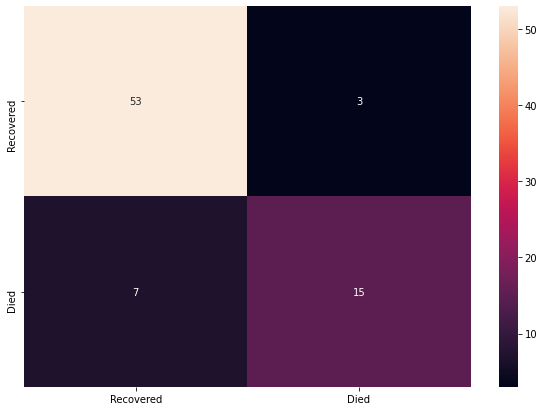

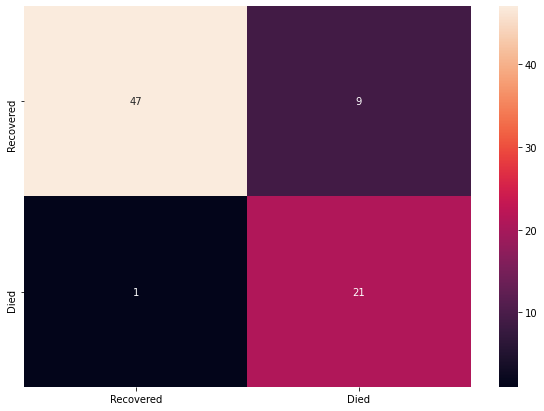

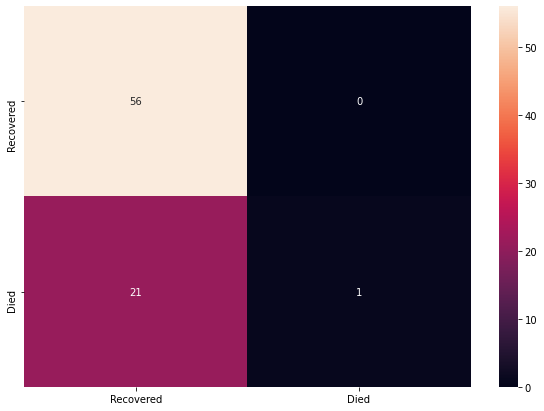

In [107]:
import seaborn as sn

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


gaussCM = confusion_matrix(y_test, preds)
multiNBCM = confusion_matrix(y_test, predMulti)
bernoulliNBCM = confusion_matrix(y_test, predBernoulli)


df_cm = pd.DataFrame(gaussCM, index = ['Recovered', 'Died'],
                  columns = ['Recovered', 'Died'])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)





mul_cm = pd.DataFrame(multiNBCM, index = ['Recovered', 'Died'],
                  columns = ['Recovered', 'Died'])
plt.figure(figsize = (10,7))
sn.heatmap(mul_cm, annot=True)



ber_cm = pd.DataFrame(bernoulliNBCM, index = ['Recovered', 'Died'],
                  columns = ['Recovered', 'Died'])
plt.figure(figsize = (10,7))
sn.heatmap(ber_cm, annot=True)





## Question 7
Let's dive more into the feature analysis.
* Create a bar plot showing the correlations between each column and `outcome`
* Pick the most 5 correlated fields (using the absolute value of correlations) and create new `X`
* Re-train your chosen Naive Bayes classifier to this data, and compare results

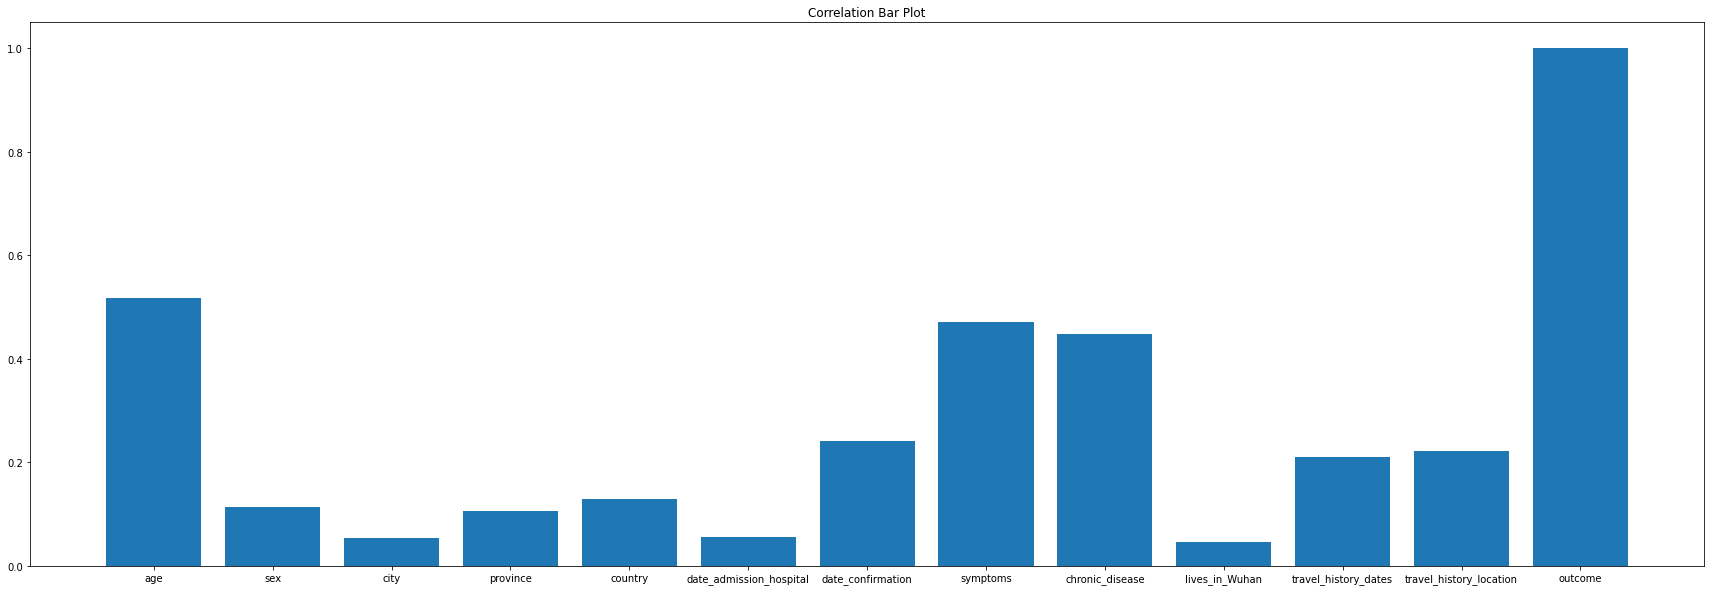

In [108]:
cols = df2.columns
corr=list()

for col in list(df2.columns):
    corr.append(abs(df2['outcome'].corr(df2[col])))





plt.rcParams['figure.figsize'] = (30, 10)
plt.bar(cols, corr, align='center')


plt.title('Correlation Bar Plot')
plt.show()

# The most related entries are age, Symptoms, Chronic Diseasees, Travel history dates and Travel History Locations

In [109]:
df2[['age', 'symptoms', 'chronic_disease', 'travel_history_dates', 'travel_history_location','outcome']]




,age,symptoms,chronic_disease,travel_history_dates,travel_history_location,outcome
0,84,95,62,47,60,1
1,65,95,62,47,60,0
2,26,95,62,47,60,0
3,59,95,62,47,60,0
4,85,95,62,47,60,0
...,...,...,...,...,...,...
767,89,95,62,47,60,1
768,89,95,62,47,60,1
769,88,95,62,47,60,1
770,100,95,62,47,60,1


#we have to recalculate all the things from scratch, we can extract the same from the array of train and test data of X, which will be shorter


In [0]:
newX_train = x_train[:, (0, 7, 8, 10, 11)]
newX_test = x_test[:, (0, 7, 8, 10, 11)]

In [111]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score



newclf = MultinomialNB()
score = cross_val_score(newclf, newX_train, y_train, cv=5)
print('Cross-Validation scores for cv=5:', score)


newclf.fit(newX_train, y_train)
newpreds = newclf.predict(newX_test)

from sklearn import metrics
from sklearn.metrics import accuracy_score

print("Previous accuracy")
print ('Accuracy: ',accuracy_score(predMulti, y_test))

print("New accuracy")
print ('Accuracy: ',accuracy_score(newpreds, y_test))


newgaussClf = GaussianNB()
newbernoulliClf = BernoulliNB()


newgaussClf.fit(newX_train, y_train)
newbernoulliClf.fit(newX_train, y_train)

newpredGauss = newgaussClf.predict(newX_test)
newpredBernoulli = newbernoulliClf.predict(newX_test)

from sklearn.metrics import accuracy_score
print()
print ('Accuracy for old Gaussian: ',accuracy_score(preds, y_test))

print ('Accuracy for new Gaussian: ',accuracy_score(newpredGauss, y_test))
print()
print ('Accuracy for oldBernoulli: ',accuracy_score(predBernoulli, y_test))

print ('Accuracy for newBernoulli: ',accuracy_score(newpredBernoulli, y_test))



Cross-Validation scores for cv=5: [0.81294964 0.79856115 0.90647482 0.78417266 0.86956522]
Previous accuracy
Accuracy:  0.8717948717948718
New accuracy
Accuracy:  0.9102564102564102

Accuracy for old Gaussian:  0.8717948717948718
Accuracy for new Gaussian:  0.8717948717948718

Accuracy for oldBernoulli:  0.7307692307692307
Accuracy for newBernoulli:  0.717948717948718


#So accuracy has increased for multi making it to 91%

<hr>

# Section 2

In this section will use [Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE](https://github.com/CSSEGISandData/COVID-19) to observe the spreading trend of COVID-19. You are required to use the data reported till **31-March-2020**.

## Question 1
Use `time_series_covid19_confirmed_global.csv` and plot the trend of disease spread in 10 most affected countries.

In [8]:
timeSeries = pd.read_csv('time_series_covid19_confirmed_global.csv')
timeSeries

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,3,4,4,4,4,4,4
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,6,6,6,6
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,4,4,4


In [0]:
# Remove all columns between column index 74 to end
timeSeries.drop(timeSeries.iloc[:, 74:], axis=1,  inplace = True) 

In [17]:
timeSeries

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
tS = timeSeries.groupby('Country/Region')
countries = timeSeries['Country/Region'].unique()
top = dict()
for c in countries:
  entity= tS.get_group(c).iloc[:, -1].sum()
  top[c]=entity
TopCountries= (sorted(top.items(), key=lambda x: x[1], reverse=True)[:10])
TopCountries

[('US', 188172),
 ('Italy', 105792),
 ('Spain', 95923),
 ('China', 82279),
 ('Germany', 71808),
 ('France', 52827),
 ('Iran', 44605),
 ('United Kingdom', 25481),
 ('Switzerland', 16605),
 ('Turkey', 13531)]

In [15]:
# extracting name from list
topCountries = [c[0] for c in TopCountries]
topCountries

['US',
 'Italy',
 'Spain',
 'China',
 'Germany',
 'France',
 'Iran',
 'United Kingdom',
 'Switzerland',
 'Turkey']

In [19]:
trends = list()
dates = list(timeSeries.columns[4:])
for c in topCountries:
  trends.append(np.array(tS.get_group(c).iloc[:, range(4, 74, 1)]).sum(axis=0))
print(dates)

['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20']


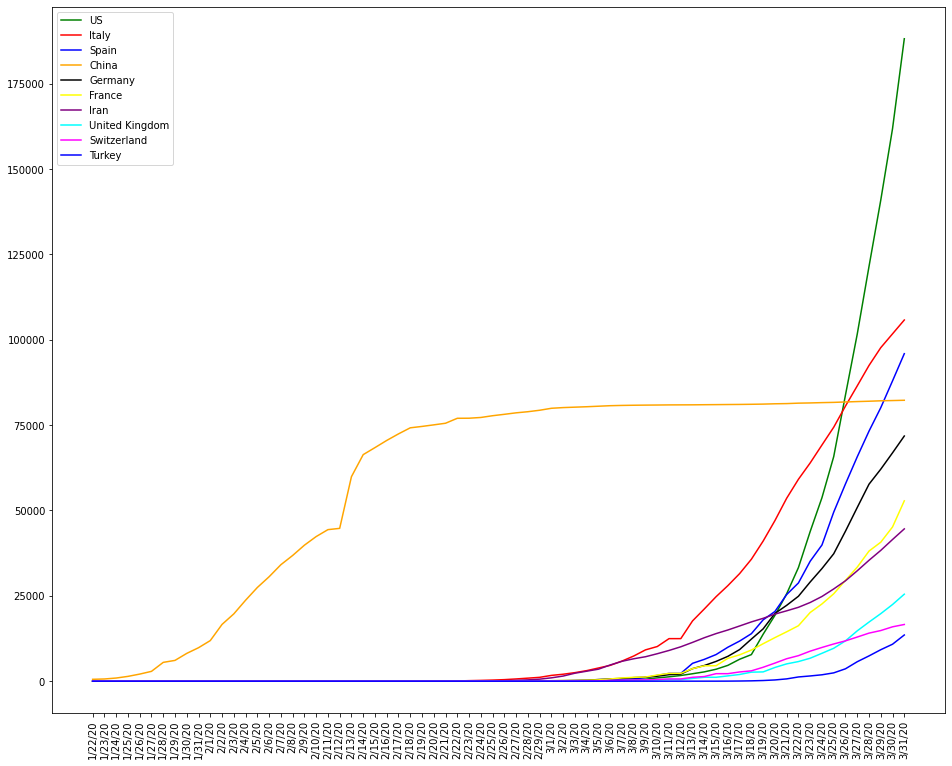

In [20]:
import matplotlib.pyplot as plt
colors = ['green', 'red', 'blue', 'orange', 'black', 'yellow', 'purple', 'aqua', 'magenta', 'blue']

fig= plt.figure(figsize=(16,13))
plt.xticks(rotation=90)
for i in range(10):
  plt.plot(dates, trends[i], color=colors[i], label=topCountries[i])


plt.legend()
plt.show()

## Question 2
Use `csse_covid_19_daily_reports` to compare the mortality and survival rates in 10 most affected countries as of 31-March-2020.

In [22]:
marchDaily = pd.read_csv('03-31-2020.csv')
marchDaily=marchDaily.groupby('Country_Region')

for c in topCountries:
  deaths = marchDaily.get_group(c)['Deaths'].sum()
  confirmed = marchDaily.get_group(c)['Confirmed'].sum()
  recovered = marchDaily.get_group(c)['Recovered'].sum()
  

  print("For",c,"=")
  print('Mortality Rate in', c,deaths/confirmed * 100)
  print('Survival Rate in', c, recovered/confirmed * 100)
  print()


For US =
Mortality Rate in US 2.0582233275939035
Survival Rate in US 3.7327551389154605

For Italy =
Mortality Rate in Italy 11.747580157289777
Survival Rate in Italy 14.86785390199637

For Spain =
Mortality Rate in Spain 8.823744044702522
Survival Rate in Spain 20.077562211357026

For China =
Mortality Rate in China 4.021682324773028
Survival Rate in China 92.61901578774658

For Germany =
Mortality Rate in Germany 1.0792669340463457
Survival Rate in Germany 22.42090017825312

For France =
Mortality Rate in France 6.68597497491813
Survival Rate in France 18.00783690158442

For Iran =
Mortality Rate in Iran 6.497029480999888
Survival Rate in Iran 32.85730299293801

For United Kingdom =
Mortality Rate in United Kingdom 7.036615517444371
Survival Rate in United Kingdom 0.7024842039166437

For Switzerland =
Mortality Rate in Switzerland 2.6076482987052096
Survival Rate in Switzerland 10.978620897320084

For Turkey =
Mortality Rate in Turkey 1.5815534698100657
Survival Rate in Turkey 1.7958

In [23]:
marchDaily

## Question 3
Identify top 5 countries (min 1000 cases) which have same spread trend as **Pakistan**. Compare progression of virus in 7 days moving window of these countries in terms of confirmed cases, deaths, and recoveries.

In [24]:
RelatedCountries = list()
countrynames=list(marchDaily.groups.keys())
for c in countrynames:
  if c == 'Pakistan':
    continue
  if marchDaily.get_group(c)['Confirmed'].sum() >= 1000:
    RelatedCountries.append(c)

RelatedCountries

['Argentina',
 'Australia',
 'Austria',
 'Belgium',
 'Brazil',
 'Canada',
 'Chile',
 'China',
 'Czechia',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Korea, South',
 'Luxembourg',
 'Malaysia',
 'Mexico',
 'Netherlands',
 'Norway',
 'Panama',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Romania',
 'Russia',
 'Saudi Arabia',
 'South Africa',
 'Spain',
 'Sweden',
 'Switzerland',
 'Thailand',
 'Turkey',
 'US',
 'United Kingdom']

<hr>

In [0]:
# timeSeries1 = pd.read_csv('time_series_covid19_confirmed_global.csv')
# timeSeries1=timeSeries1.drop(timeSeries1.iloc[:, 74:], axis = 1)

# #.groupby(['Country/Region'])#.sum().reset_index()
# timeSeries2 = pd.read_csv('time_series_covid19_deaths_global.csv').groupby(['Country/Region']).sum().reset_index()
# timeSeries3 = pd.read_csv('time_series_covid19_recovered_global.csv').groupby(['Country/Region']).sum().reset_index()

In [48]:
timeSeries

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Taking transpose of the matrix to take the correlations

In [34]:
timeSeries

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
confirmedDf = timeSeries.groupby(['Country/Region']).sum().reset_index()
confirmedDf=confirmedDf.set_index('Country/Region').transpose()
confirmedDf = confirmedDf.drop(['Lat', 'Long'])
confirmedDf

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Congo (Brazzaville),Congo (Kinshasa),...,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,548.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,643.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,920.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1406.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2075.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/27/20,110.0,186.0,409.0,267.0,4.0,7.0,589.0,329.0,3143.0,7657.0,165.0,10.0,466.0,48.0,24.0,94.0,7284.0,2.0,6.0,3.0,61.0,237.0,0.0,3417.0,115.0,293.0,180.0,8.0,0.0,5.0,99.0,91.0,4682.0,3.0,3.0,1610.0,81897.0,539.0,4.0,51.0,...,1104.0,119.0,457.0,7.0,0.0,732.0,269.0,632.0,3.0,1170.0,0.0,65719.0,106.0,3.0,8.0,3069.0,12928.0,5.0,267.0,13.0,1136.0,1.0,25.0,66.0,227.0,5698.0,101657.0,23.0,310.0,405.0,14745.0,238.0,88.0,107.0,163.0,91.0,0.0,0.0,22.0,5.0
3/28/20,110.0,197.0,454.0,308.0,5.0,7.0,690.0,407.0,3640.0,8271.0,182.0,10.0,476.0,48.0,26.0,94.0,9134.0,2.0,6.0,3.0,74.0,258.0,0.0,3904.0,120.0,331.0,207.0,8.0,0.0,5.0,99.0,91.0,5576.0,3.0,3.0,1909.0,81999.0,608.0,4.0,65.0,...,1203.0,130.0,659.0,8.0,0.0,802.0,292.0,684.0,3.0,1187.0,0.0,73235.0,113.0,5.0,8.0,3447.0,14076.0,5.0,283.0,14.0,1245.0,1.0,25.0,74.0,278.0,7402.0,121465.0,30.0,356.0,468.0,17312.0,274.0,104.0,119.0,174.0,98.0,0.0,0.0,28.0,7.0
3/29/20,120.0,212.0,511.0,334.0,7.0,7.0,745.0,424.0,3984.0,8788.0,209.0,11.0,499.0,48.0,33.0,94.0,10836.0,2.0,6.0,4.0,81.0,323.0,0.0,4256.0,126.0,346.0,222.0,10.0,0.0,6.0,103.0,139.0,6280.0,3.0,3.0,2139.0,82122.0,702.0,19.0,65.0,...,1299.0,142.0,741.0,8.0,0.0,844.0,314.0,730.0,3.0,12

In [0]:
corr_list=list()
for c in RelatedCountries:
  corr = confirmedDf['Pakistan'].corr(confirmedDf[c])
  corr_list.append(corr)
  

In [37]:
corr_df = pd.DataFrame({'Country/Region':RelatedCountries, 'Relation':corr_list})
trendDf = corr_df.nlargest(5, 'Relation')
top5Countries = trendDf['Country/Region'].tolist()
print("The top 5 countries with same trend as Pakistan are", top5Countries)


The top 5 countries with same trend as Pakistan are ['Germany', 'Indonesia', 'Austria', 'Switzerland', 'Czechia']


In [38]:
len(confirmedDf)

70

In [0]:
time=time.groupby(['Country/Region'])

In [41]:
time=timeSeries.groupby(['Country/Region']).sum().reset_index()
#time=timeSeries1
time

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20
0,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174
1,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243
2,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716
3,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376
4,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,7,16,16,19,26,30,30,31,35,38,38,39,41,44,47,48,52,59,59,59,84,91,98,109,116,119
181,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
182,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
183,Zambia,-15.416700,28.283300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,3,3,3,12,16,22,28,29,35,35


In [0]:
timeSeries=timeSeries.groupby(['Country/Region']).sum().reset_index()
timeSeries=timeSeries.groupby(['Country/Region'])


timeSeries2 = pd.read_csv('time_series_covid19_deaths_global.csv').groupby(['Country/Region']).sum().reset_index()
timeSeries2=timeSeries2.groupby(['Country/Region'])   #used handy in next part


timeSeries3 = pd.read_csv('time_series_covid19_recovered_global.csv').groupby(['Country/Region']).sum().reset_index()
timeSeries3=timeSeries3.groupby(['Country/Region'])


In [0]:
confirmedWindow = list()
deathsWindow = list()
recoveredWindow = list()
for c in top5Countries:
  for i in range(64):
    
    confirmedWindow.append(int(timeSeries.get_group(c).iloc[:, range(3+i,3+i+7 )].sum(axis=1)/7))
    deathsWindow.append(int(timeSeries2.get_group(c).iloc[:, range(3+i,3+i+7 )].sum(axis=1)/7))
    recoveredWindow.append(int(timeSeries3.get_group(c).iloc[:, range(3+i,3+i+7 )].sum(axis=1)/7))

    #avg_deaths = int(deaths_df[c].iloc[i:i+7].sum()/7)
    #avg_rec = int(recovered_df[c].iloc[i:i+7].sum()/7)

    # confirmed_avg_list.append(avg_conf)
    # deaths_avg_list.append(avg_deaths)
    # recovered_avg_list.append(avg_rec)

confirmedWindow = np.array(confirmed_avg_list).reshape(5,64)    
deathsWindow = np.array(deaths_avg_list).reshape(5,64)
recoveredWindow = np.array(recovered_avg_list).reshape(5,64)

In [62]:
print("the Required windows are stored as follows for 5 countries in the array: \n")
print("for confirmed: \n",confirmedWindow )

print("for death: \n",deathsWindow )

print("for recovered: \n",recoveredWindow )


the Required windows are stored as follows for 5 countries in the array: 

for confirmed: 
 [[    0     1     1     2     3     5     6     7     9    10    11    12
     12    12    13    14    14    15    15    15    16    16    16    16
     16    16    16    16    16    17    22    26    35    51    72    97
    131   193   282   385   515   660   840  1076  1304  1733  2274  2953
   3824  4938  6427  8318 10629 13147 15872 18984 22374 25945 30033 34465
  39534 44852 50256 55802]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     1     1     2     3     5     9    13    18    27    40    56
     73    93   121   160   203   254   311   374   448   528   611   708
    809   919  1038  1158]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0   

Germany


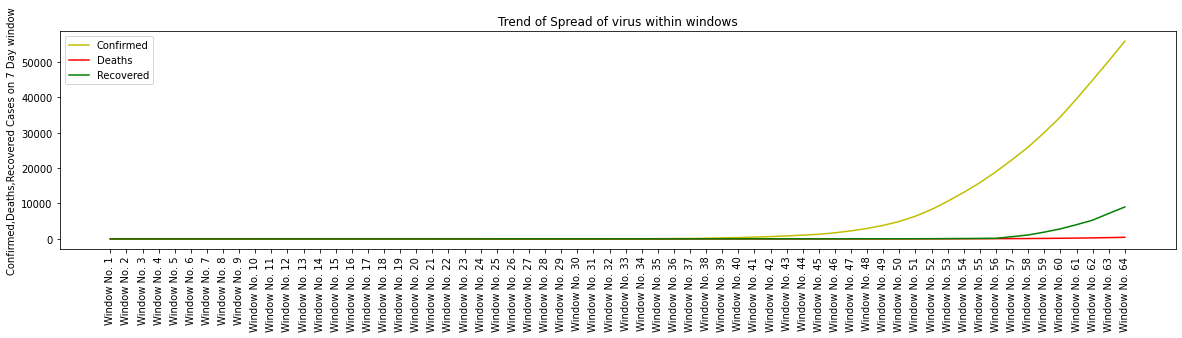

Indonesia


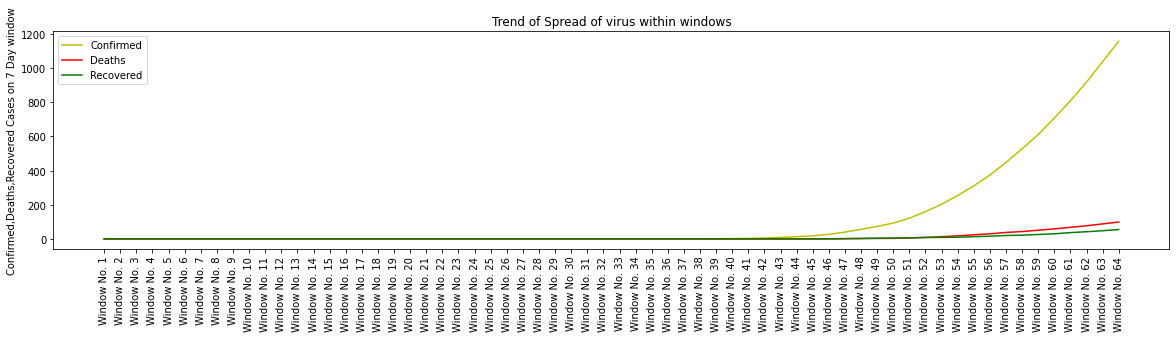

Austria


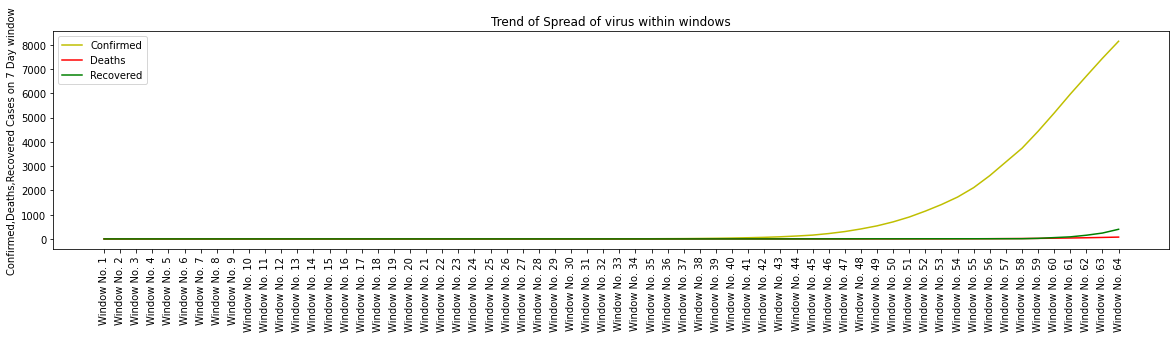

Switzerland


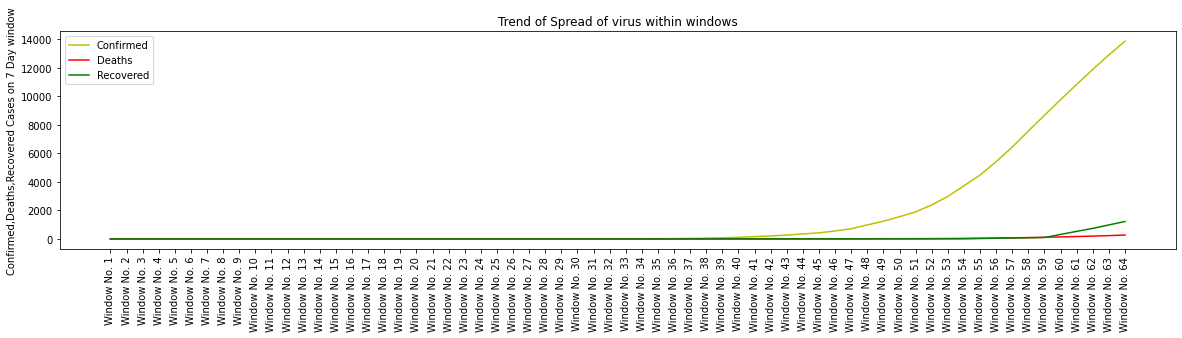

Czechia


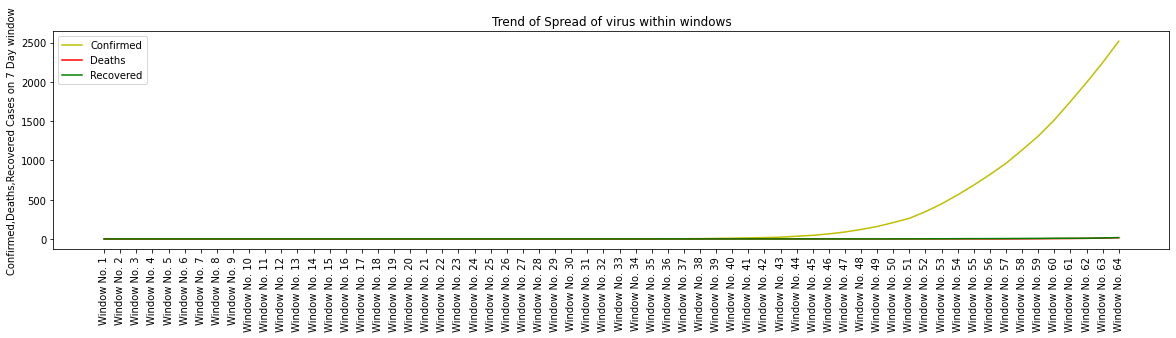

In [70]:
#Plotting progression of virus in 7 days moving window of these countries in terms of confirmed cases, deaths, and recoveries
Windows = list()
for i in range(64):
  string = 'Window No. '+str((i+1))
  Windows.append(string)


for i in range(5):
  fig = plt.figure(figsize=(20,4))
  plt.plot(Windows, confirmedWindow[i], color='y', label = 'Confirmed')
  plt.plot(Windows, deathsWindow[i], color='r', label = 'Deaths')
  plt.plot(Windows, recoveredWindow[i], color='g', label = 'Recovered')
  plt.ylabel('Confirmed,Deaths,Recovered Cases on 7 Day window')
  plt.xticks(rotation = 90)
  print(top5Countries[i])
  plt.title('Trend of Spread of virus within windows')
  plt.legend()
  plt.show()

## Bonus
Calculate and plot the min, max, average, median number of days for a patient to recover using one of the data files mentioned above. <br>**Hint:** use `boxplot`